# Imports and aux functions

In [59]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
np.set_printoptions(threshold=np.inf)

In [61]:
def round_to_nearest(number, lower_limit, upper_limit):
    diff_lower = abs(number - lower_limit)
    diff_upper = abs(number - upper_limit)
    
    if diff_lower < diff_upper:
        return lower_limit
    else:
        return upper_limit

# First Tests

In [73]:
directory = './samples/'

target_filenames = ['100.csv', '150.csv', '200.csv', '250.csv','280.csv', '300.csv', '350.csv', '400.csv']
x,y=[],[]
for filename in target_filenames:
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath):  # Check if the file exists
        f = pd.read_csv(filepath, delimiter='\t')
        x.append(f.drop(columns=['channel', 'experimental', 'smoothed', 'Au', '197Au']).values)
        y.append(int(filename.replace('.csv', '')))  # Extract the numeric value from the filename

print("X Data:")
for data in x:
    print(data)
print("\nY Labels:", y)

X Data:
[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [

[100 150 200 250 300 350 400 450 500]


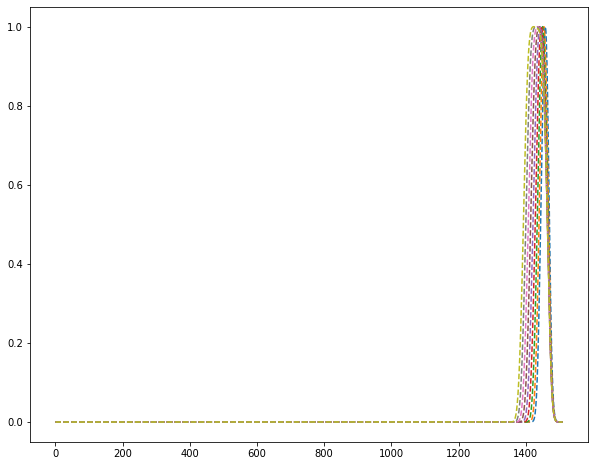

In [119]:
Xx = []
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X = np.array(Xx)
Y = np.array(y)
print(Y)

yaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(10, 8))
for i in X:
    plt.plot(yaxis,i,'--') 

plt.show()

In [75]:
x_train, x_test, labels_train, labels_test = train_test_split(X, Y, test_size = 1, random_state = 2)

print('Numero de espetros: '+ str(len(X)))
print('Numero de bins em cada espetro: '+str(len(X[0])))
print("Normalized test spectrum\n", x_test)
print('\n')
print("Label test\n", labels_test)

Numero de espetros: 8
Numero de bins em cada espetro: 1878
<class 'numpy.ndarray'>
Normalized test spectrum
 [[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00

# ANN to predict thickness of target

In [125]:
with open('data.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('labels.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)

del y[len(y)-1]

Blue graph: Thick:600.2902564706321 Angle: 165.0
Orange graph: Thick:604.8508309141174 Angle: 140.0


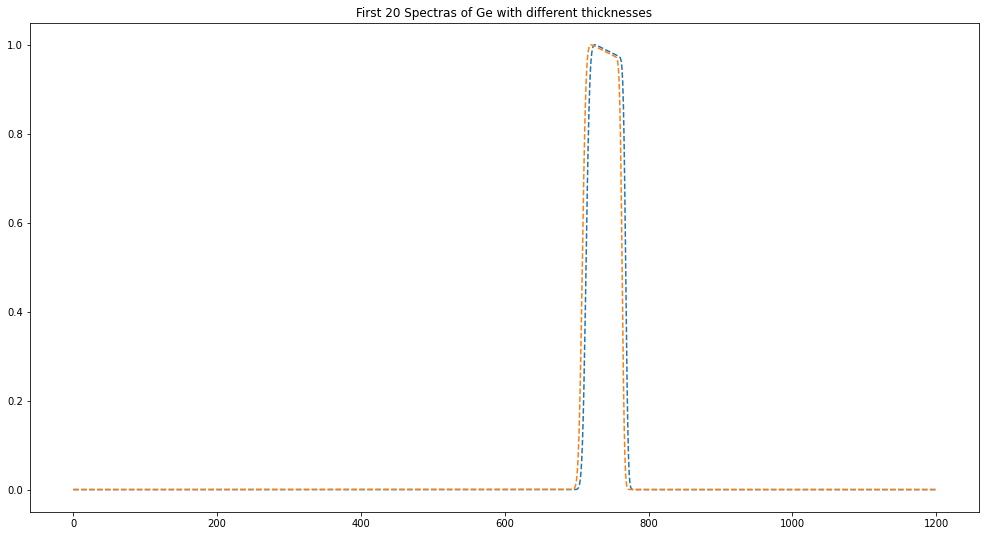

In [128]:
Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
plt.plot(xaxis,X[0],'--')
print('Blue graph: Thick:'+str(Y[0][0])+' Angle: '+str(Y[0][1]))
plt.plot(xaxis,X[2],'--')
print('Orange graph: Thick:'+str(Y[3][0])+' Angle: '+str(Y[3][1]))
plt.title('First 20 Spectras of Ge with different thicknesses')
plt.show()

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=10,random_state=np.random.randint(0,50))

In [130]:
model=keras.models.Sequential(
    [keras.layers.Dense(150,activation='relu',input_shape=(1200,)),
     keras.layers.Dense(75,activation='relu'),
     keras.layers.Dense(25,activation='relu'),
     keras.layers.Dense(2,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32

In [131]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 150)               180150    
                                                                 
 dense_51 (Dense)            (None, 75)                11325     
                                                                 
 dense_52 (Dense)            (None, 25)                1900      
                                                                 
 dense_53 (Dense)            (None, 2)                 52        
                                                                 
Total params: 193427 (755.57 KB)
Trainable params: 193427 (755.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [132]:
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size)

Epoch 1/150
5/5 [==============================] - 1s 5ms/step - loss: 192252.5156 - mae: 376.3860
Epoch 2/150
5/5 [==============================] - 0s 7ms/step - loss: 191719.1406 - mae: 375.9764
Epoch 3/150
5/5 [==============================] - 0s 6ms/step - loss: 190940.7031 - mae: 375.4247
Epoch 4/150
5/5 [==============================] - 0s 7ms/step - loss: 189621.6875 - mae: 374.4607
Epoch 5/150
5/5 [==============================] - 0s 7ms/step - loss: 187493.0938 - mae: 372.8534
Epoch 6/150
5/5 [==============================] - 0s 5ms/step - loss: 184176.1562 - mae: 370.2659
Epoch 7/150
5/5 [==============================] - 0s 8ms/step - loss: 179254.0000 - mae: 366.3331
Epoch 8/150
5/5 [==============================] - 0s 7ms/step - loss: 172102.7344 - mae: 360.5417
Epoch 9/150
5/5 [==============================] - 0s 6ms/step - loss: 162186.6875 - mae: 352.1297
Epoch 10/150
5/5 [==============================] - 0s 6ms/step - loss: 148946.0938 - mae: 340.1831
Epoch 11/

In [124]:
#loss, mae = model.evaluate(X_test, y_test)
#print("Mean Absolute Error:", mae)

Mean Absolute Error: 6.498924255371094


In [133]:
predictions=model.predict(X_test)
for i in range(len(predictions)):
    predictions[i][1]=round_to_nearest(predictions[i][1], 140, 165)

for i in range(len(predictions)):
    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('Prediction: ' + str(predictions[i][0]) + '. Real value: ' + str(y_test[i][0]))
    print('Angle: ')
    print('Prediction: ' + str(predictions[i][1]) + '. Real value: ' + str(y_test[i][1]))
    print()
    print()

1/1 [==============================] - 0s 225ms/step
Target 1 :
Thickness: 
Prediction: 634.6113. Real value: 636.903694151541
Angle: 
Prediction: 165.0. Real value: 140.0


Target 2 :
Thickness: 
Prediction: 570.5872. Real value: 569.5601140999823
Angle: 
Prediction: 140.0. Real value: 165.0


Target 3 :
Thickness: 
Prediction: 647.48883. Real value: 647.0097445224
Angle: 
Prediction: 165.0. Real value: 165.0


Target 4 :
Thickness: 
Prediction: 557.2606. Real value: 556.1822078613469
Angle: 
Prediction: 140.0. Real value: 165.0


Target 5 :
Thickness: 
Prediction: 614.45825. Real value: 613.7595851151335
Angle: 
Prediction: 165.0. Real value: 165.0


Target 6 :
Thickness: 
Prediction: 590.82324. Real value: 592.547164399722
Angle: 
Prediction: 140.0. Real value: 140.0


Target 7 :
Thickness: 
Prediction: 600.5796. Real value: 598.0233734424995
Angle: 
Prediction: 140.0. Real value: 165.0


Target 8 :
Thickness: 
Prediction: 587.784. Real value: 585.855094374701
Angle: 
Prediction: 14